In [1]:

print("At least it prints!")
print("ALIP")


At least it prints!
ALIP


In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
os.chdir(r'D:\Documents\Stevens\FE-511\project')
print(os.getcwd())


d:\Documents\Stevens\FE-511\project


In [3]:
df = pd.read_excel('Data/1-FINAL_DATA.xlsx', sheet_name = 'FINAL')
n_row, n_col = df.shape
df.head(3)

,Time_Index,TIME,YEAR,Date_Time,Revenue,MEDIAN_REVENUE_(EXPERT),HIGH_REVENUE_(EXPERT),LOW_REVENUE_(EXPERT),Revenue - POP,Segment Revenue,...,Industrial Production (yoy %),"Housing Starts (000s, saar)",Housing Starts (%),"Building Permits (000s, saar)",Building Permits (%),"New Home Sales (000s, saar)",New Home Sales (%),"Existing Home Sales (mn, saar)",Existing Home Sales (%),Gov't Budget Balance (% of GDP)
0,1,2017 Q1,2017,2017-03-01,1006.439,995.5,1001.0,991,NaN,NaN,...,0.93,1190,NaN,1285,NaN,643,NaN,5.61,NaN,-3.410
1,2,2017 Q2,2017,2017-06-01,1075.172,1072.0,1084.0,1054,6.829326,NaN,...,1.60,1247,4.789916,1329,3.424125,612,-4.821151,5.49,-2.139037,-3.672
2,3,2017 Q3,2017,2017-09-01,1110.800,1107.0,1121.0,1088,3.313702,NaN,...,1.16,1175,-5.773857,1257,-5.417607,622,1.633987,5.45,-0.728597,-3.404


In [4]:
df.dtypes

Time_Index                                  int64
TIME                                       object
YEAR                                        int64
Date_Time                          datetime64[ns]
Revenue                                   float64
                                        ...      
New Home Sales (000s, saar)                 int64
New Home Sales (%)                        float64
Existing Home Sales (mn, saar)            float64
Existing Home Sales (%)                   float64
Gov't Budget Balance (% of GDP)           float64
Length: 142, dtype: object

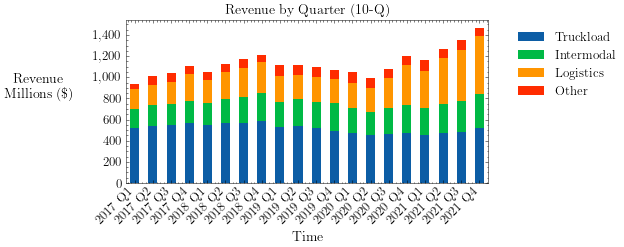

In [5]:
with plt.style.context('science'):
    sub_df = df[df['Time_Index'] <= 20]  
    quaters = list(sub_df['TIME'])
    sub_df = sub_df[['Truckload', 'Intermodal', 'Logistics', 'Other']]
    
    # This is where the fun begins. 
    ax = sub_df.plot.bar(stacked=True, figsize=(6.5, 3.0))
    ax.set_xticklabels(quaters)

    ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    for label in (ax.get_yticklabels()  + ax.get_xticklabels()):
     	label.set_fontsize(13)
    
    plt.title("Revenue by Quarter (10-Q)", fontsize = 14)
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', fancybox = True, fontsize = 13)
    plt.xlabel('Time', fontsize = 14)
    plt.ylabel('Revenue \n Millions $ (\$) $', rotation = 'horizontal', fontsize = 14, labelpad= 55)

    plt.xticks(rotation = 45)
    plt.setp(ax.xaxis.get_majorticklabels(), ha='right')
    #plt.savefig('plots/revenue_by_seg.svg', format='svg' , dpi = 450)
    plt.show()

In [6]:
# Time Series .... 
sub_df = df[df['Time_Index'] <= 20] 
pivot = pd.pivot_table(sub_df, values = ['Truckload-Revenue','Intermodal-Revenue', 'Logistics-Revenue', 'Other-Revenue'], index = ['YEAR'], 
        aggfunc = {'Truckload-Revenue':  np.sum,
                   'Intermodal-Revenue': np.sum,
                   'Logistics-Revenue': np.sum,
                   'Other-Revenue': np.sum})

row, col = pivot.shape
print(row)
pivot


5


,Intermodal-Revenue,Logistics-Revenue,Other-Revenue,Truckload-Revenue
YEAR,,,,
2017,780.0,834.2,293.5,2187.4
2018,953.5,1024.7,322.0,2268.0
2019,1007.8,934.8,371.3,2078.2
2020,974.7,1129.3,359.0,1851.0
2021,1143.1,1808.7,365.3,1934.9


In [7]:
Intermodal = []
Logistics = []
Other = []
Truckload = []

Intermodal.append(np.nan)
Logistics.append(np.nan)
Other.append(np.nan)
Truckload.append(np.nan)

for i in range(1, row):
    Intermodal.append(round( ((pivot['Intermodal-Revenue'].iloc[i] - pivot['Intermodal-Revenue'].iloc[(i-1)]) / pivot['Intermodal-Revenue'].iloc[(i-1)])*100,2))

    Logistics.append(round( ((pivot['Logistics-Revenue'].iloc[i] - pivot['Logistics-Revenue'].iloc[(i-1)]) / pivot['Logistics-Revenue'].iloc[(i-1)] )*100,2))

    Other.append( round( ((pivot['Other-Revenue'].iloc[i] - pivot['Other-Revenue'].iloc[(i-1)]) / pivot['Other-Revenue'].iloc[(i-1)])*100,2))

    Truckload.append( round(((pivot['Truckload-Revenue'].iloc[i] - pivot['Truckload-Revenue'].iloc[(i-1)]) / pivot['Truckload-Revenue'].iloc[(i-1)])*100,2) )

pivot.insert(1, 'Intermodal (YoY %)', Intermodal)
pivot.insert(3, 'Logistics (YoY %)', Logistics)
pivot.insert(5, 'Other (YoY %)', Other)
pivot.insert(7, 'Truckload (YoY %)', Truckload)


In [8]:
pivot = pivot.reset_index()
pivot['YEAR'] = pivot['YEAR'].astype(int)
pivot.head()

,YEAR,Intermodal-Revenue,Intermodal (YoY %),Logistics-Revenue,Logistics (YoY %),Other-Revenue,Other (YoY %),Truckload-Revenue,Truckload (YoY %)
0,2017,780.0,NaN,834.2,NaN,293.5,NaN,2187.4,NaN
1,2018,953.5,22.24,1024.7,22.84,322.0,9.71,2268.0,3.68
2,2019,1007.8,5.69,934.8,-8.77,371.3,15.31,2078.2,-8.37
3,2020,974.7,-3.28,1129.3,20.81,359.0,-3.31,1851.0,-10.93
4,2021,1143.1,17.28,1808.7,60.16,365.3,1.75,1934.9,4.53


In [9]:
pivot.columns 

Index(['YEAR', 'Intermodal-Revenue', 'Intermodal (YoY %)', 'Logistics-Revenue',
       'Logistics (YoY %)', 'Other-Revenue', 'Other (YoY %)',
       'Truckload-Revenue', 'Truckload (YoY %)'],
      dtype='object')

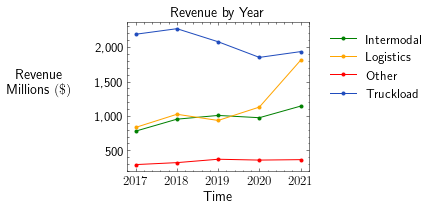

In [10]:
with plt.style.context('science'):
    fig, ax = plt.subplots(figsize=(3.25, 2.75))

    plt.plot(pivot['YEAR'], pivot['Intermodal-Revenue'], marker = ".", label = 'Intermodal', color = 'Green')
    plt.plot(pivot['YEAR'], pivot['Logistics-Revenue'], marker = ".", label = 'Logistics', color = '#ffa500')
    plt.plot(pivot['YEAR'], pivot['Other-Revenue'], marker = ".", label = "Other", color = 'Red')
    plt.plot(pivot['YEAR'], pivot['Truckload-Revenue'], marker = ".", label = 'Truckload', color = '#204cbd')

    ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    for label in (ax.get_yticklabels()  + ax.get_xticklabels()):
     	label.set_fontsize(13)
    
    plt.title('Revenue by Year', fontsize = 14)
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', fancybox = True, fontsize = 13)
    plt.xlabel('Time', fontsize = 14)
    plt.ylabel('Revenue \n  Millions $(\$) $', rotation = 'horizontal', fontsize = 14, labelpad= 55)

    #plt.xticks(rotation = 45)
    #plt.setp(ax.xaxis.get_majorticklabels(), ha='right')
    #plt.savefig('plots/revenue_by_seg_year.svg', format='svg', dpi = 450 )



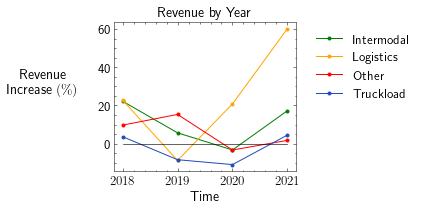

In [11]:


with plt.style.context('science'):
    fig, ax = plt.subplots(figsize=(3.25, 2.75))

    plt.plot(pivot['YEAR'], pivot['Intermodal (YoY %)'], marker = ".", label = 'Intermodal', color = 'Green')
    plt.plot(pivot['YEAR'], pivot['Logistics (YoY %)'], marker = ".", label = 'Logistics', color = '#ffa500')
    plt.plot(pivot['YEAR'], pivot['Other (YoY %)'], marker = ".", label = "Other", color = 'Red')
    plt.plot(pivot['YEAR'], pivot['Truckload (YoY %)'], marker = ".", label = 'Truckload', color = '#204cbd')
    

    ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    for label in (ax.get_yticklabels()  + ax.get_xticklabels()):
     	label.set_fontsize(13)
    
    plt.title("Revenue by  Year", fontsize = 14)
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', fancybox = True, fontsize = 13)
    plt.xlabel('Time', fontsize = 14)
    plt.ylabel('Revenue \n Increase $ (\%) $', rotation = 'horizontal', fontsize = 14, labelpad= 55)

    #plt.xticks(rotation = 45) 
    #plt.setp(ax.xaxis.get_majorticklabels(), ha='right')
    plt.plot(pivot['YEAR'].iloc[1:], [0]* (len(pivot['YEAR'])-1),  color = '#000000', linewidth = .6)
    #plt.savefig('plots/revenue_by_seg_year_percent.svg', format='svg', dpi = 450)




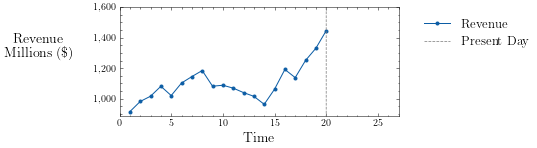

In [12]:

with plt.style.context('science'):
    fig, ax = plt.subplots(figsize=(5.0, 2.0))

    y = df['Total Revenue-GAAP']
    x = df['Time_Index']
    ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

    plt.plot(x, y, label = 'Revenue', marker = ".")
    
    y_new = list(range(800, 2000)) ; l = len(y_new)
    plt.plot([20]*l, y_new , color = 'grey', linestyle='dashed', linewidth = .75, label = 'Present Day')

    plt.xlabel('Time', fontsize = 14)
    plt.ylabel('Revenue \n Millions $(\$)$', rotation = 'horizontal', fontsize = 14, labelpad= 55)

    plt.xlim(0, np.max(df['Time_Index']))
    plt.ylim(890, 1600)

    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', fancybox = True, fontsize = 13)
    #plt.savefig('plots/total_rev_quaterly.svg', format='svg' ,dpi = 450)
    plt.show()



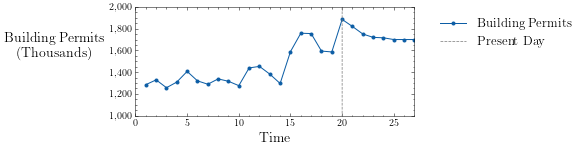

In [13]:

with plt.style.context('science'):
    fig, ax = plt.subplots(figsize=(5.0, 2.0))

    y = df['Building Permits (000s, saar)']
    x = df['Time_Index']
    ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

    plt.plot(x, y, label = 'Building Permits', marker = ".")

    plt.xlabel('Time', fontsize = 14)
    plt.ylabel('Building Permits \n (Thousands)', rotation = 'horizontal', fontsize = 14, labelpad= 55)

    plt.xlim(0, np.max(df['Time_Index']))
    plt.ylim(1000, 2000)

    y_new = list(range(800, 2000)) ; l = len(y_new)
    plt.plot([20]*l, y_new , color = 'grey', linestyle='dashed', linewidth = .75, label = 'Present Day')
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', fancybox = True, fontsize = 13)
    #plt.savefig('plots/time_series_building_permits.svg', format='svg' ,dpi = 450)
    plt.show()


In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
x = np.array(df['Building Permits (000s, saar)'].iloc[:20]).reshape((-1, 1))
y = np.array(df['Total Revenue-GAAP'].iloc[:20])

model = LinearRegression()
model.fit(x, y)

r_sq = model.score(x, y)
print(r_sq)

print('intercept:', model.intercept_)

print('slope:', model.coef_)




0.49926613463706115
intercept: 416.7121909548482
slope: [0.47800853]


In [16]:
x_range = list(range(np.min(x), np.max(x)))
y_fit = []
for x_i in x_range:
    y_i = float(model.coef_*x_i + model.intercept_)
    y_fit.append(  y_i  )


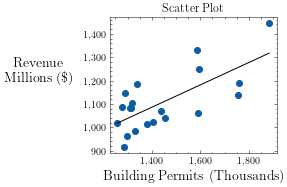

In [17]:

with plt.style.context('science'):
    fig, ax = plt.subplots(figsize=(3.0, 2.5))

    y = df['Total Revenue-GAAP']
    x = df['Building Permits (000s, saar)']
    ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    
    plt.scatter(x, y, label = 'Revenue')

    plt.xlabel('Building Permits (Thousands)', fontsize = 14)
    plt.ylabel('Revenue \n Millions $(\$)$', rotation = 'horizontal', fontsize = 14, labelpad= 45)
    plt.title("Scatter Plot")

    plt.plot(x_range, y_fit, color = 'black')
    #plt.savefig('plots/scatter_revenue_housing_permits.svg', format='svg' ,dpi = 450)
    plt.show()

In [20]:
x = df['Time_Index']

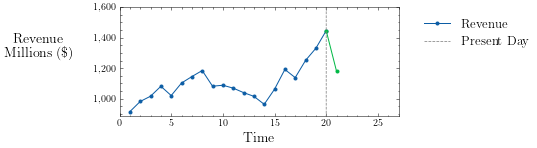

In [21]:
x1 = [21]
y1 = [1180]

x1.append(20)
y1.append(df['Total Revenue-GAAP'].iloc[19])

with plt.style.context('science'):
    fig, ax = plt.subplots(figsize=(5.0, 2.0))

    y = df['Total Revenue-GAAP']
    x = df['Time_Index']
    ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

    plt.plot(x, y, label = 'Revenue', marker = ".")
    plt.plot(x1, y1, marker = '.')
    
    y_new = list(range(800, 2000)) ; l = len(y_new)
    plt.plot([20]*l, y_new , color = 'grey', linestyle='dashed', linewidth = .75, label = 'Present Day')

    plt.xlabel('Time', fontsize = 14)
    plt.ylabel('Revenue \n Millions $(\$)$', rotation = 'horizontal', fontsize = 14, labelpad= 55)

    plt.xlim(0, np.max(df['Time_Index']))
    plt.ylim(890, 1600)

    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', fancybox = True, fontsize = 13)
    #plt.savefig('plots/timeseries_totalrev_predict1.svg', format='svg' ,dpi = 450)
    plt.show()
